# Data Verification

## Initialisation

The following modules are required.

In [14]:
import numpy
import scipy.stats
import matplotlib.pyplot

## Loading

Here, we import the previously defined dataset from the compressed Numpy file.

In [15]:
dataSet = numpy.load("../data/compressedDatasets1km.npz")

In [16]:
terrainData1km = dataSet["terrainData1km"]

In [17]:
terrainHeader = dataSet["terrainHeader"]

In [37]:
expectedRanges = {"coeff_var_z": [0, 10], "density_absolute_mean": [0, 1000000], "eigenv_1": [0, 1], "eigenv_2": [0, 1], "eigenv_3": [0, 1], "gps_time": [0, 1000000], "intensity": [0, 1000000], "kurto_z": [0, 20], "max_z": [0, 50], "mean_z": [0, 25], "median_z": [0, 50], "min_z": [0, 5], "perc_10": [0, 50], "perc_100": [0, 50], "perc_20": [0, 50], "perc_30": [0, 50], "perc_40": [0, 50], "perc_50": [0, 50], "perc_60": [0, 50], "perc_70": [0, 50], "perc_80": [0, 50], "perc_90": [0, 50], "point_density": [0, 60], "pulse_penetration_ratio": [0, 100], "range": [0, 50], "skew_z": [0, 20], "std_z": [0, 20], "var_z": [0, 20]}

## Verification

Let's examine if the features are evenly distributed in space. By using a Gaussian kernel, we can see the local density of points in a scatter plot.

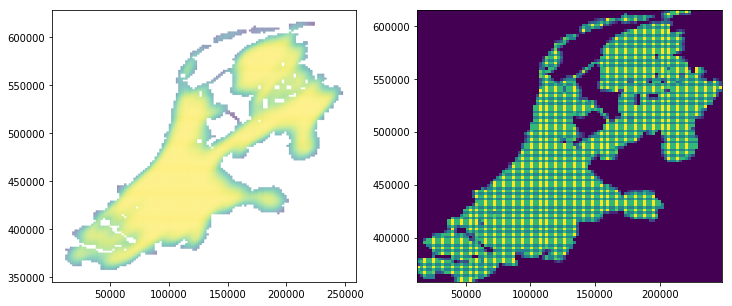

In [19]:
x = terrainData1km[:, 0]
y = terrainData1km[:, 1]
xy = numpy.vstack([x, y])
d = scipy.stats.gaussian_kde(xy, bw_method=0.1)(xy)
fig = matplotlib.pyplot.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
matplotlib.pyplot.scatter(x, y, s=0.05, c=d)
fig.add_subplot(1, 2, 2)
matplotlib.pyplot.hist2d(x, y, (100, 100))
matplotlib.pyplot.show()

Let's examine all features in a scatter plot and print some basic information.

In [35]:
def summariseData(x, y, z, feature=""):
    print("Feature: {}".format(feature))
    print("Count: {:d} | Count NaNs: {:d} | Percentage NaN: {:.3f}".format(
        z.shape[0],
        numpy.count_nonzero(numpy.isnan(z)),
        100 * numpy.count_nonzero(numpy.isnan(z)) / z.shape[0]
    ))
    print("Min: {:.3f} | Max: {:.3f}".format(
        numpy.nanmin(z),
        numpy.nanmax(z)
    ))
    print("Mean: {:.3f} | Standard Dev: {:.3f}".format(
        numpy.nanmean(z),
        numpy.nanstd(z)
    ))
    print("Expected Minimum: {:.3f} | Expected Maximum: {:.3f}".format(
        expectedRanges[feature][0],
        expectedRanges[feature][1]
    ))
    fig = matplotlib.pyplot.figure(figsize=(13, 4))
    fig.add_subplot(1, 4, 1)
    matplotlib.pyplot.scatter(x, y, s=0.05, c=z)
    fig.add_subplot(1, 4, 2)
    matplotlib.pyplot.scatter(x, y, s=0.05, c=numpy.isnan(z))
    fig.add_subplot(1, 4, 3)
    matplotlib.pyplot.hist(z[~numpy.isnan(z)])
    fig.add_subplot(1, 4, 4)
    matplotlib.pyplot.boxplot(z[~numpy.isnan(z)], showfliers=False)
    matplotlib.pyplot.show()

Feature: coeff_var_z
Count: 22648 | Count NaNs: 2102 | Percentage NaN: 9.281
Min: -6973.718 | Max: 70410.276
Mean: 9.317 | Standard Dev: 499.752
Expected Minimum: 0.000 | Expected Maximum: 10.000


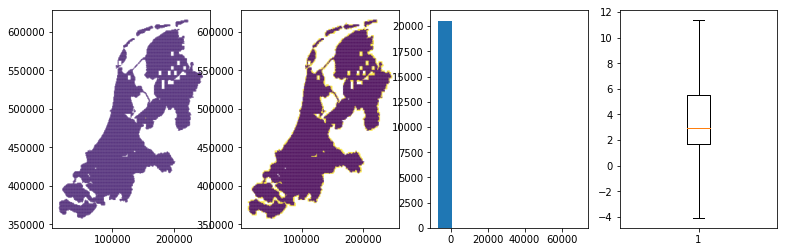

Feature: density_absolute_mean
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 99.968
Mean: 16.253 | Standard Dev: 16.067
Expected Minimum: 0.000 | Expected Maximum: 1000000.000


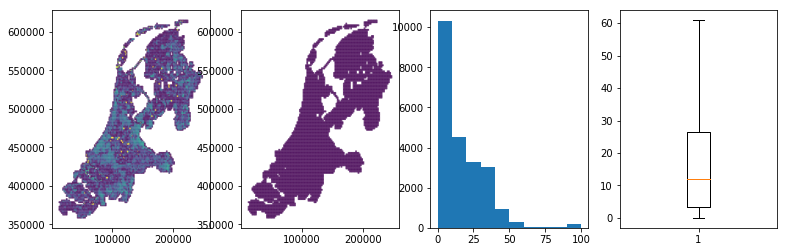

Feature: eigenv_1
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 69028.231
Mean: 19850.313 | Standard Dev: 7096.983
Expected Minimum: 0.000 | Expected Maximum: 1.000


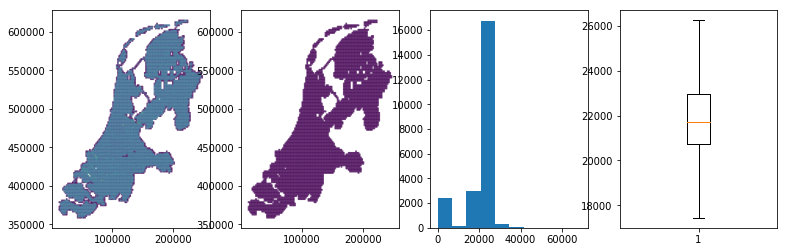

Feature: eigenv_2
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 27951.328
Mean: 16260.605 | Standard Dev: 6468.721
Expected Minimum: 0.000 | Expected Maximum: 1.000


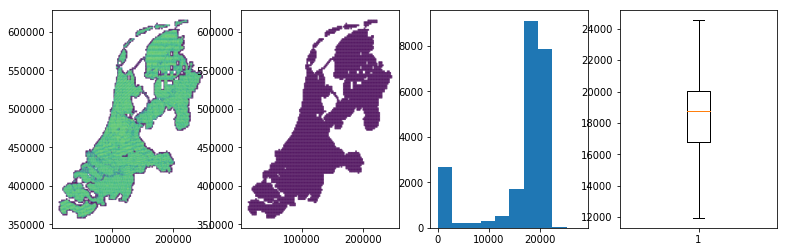

Feature: eigenv_3
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 340.094
Mean: 11.199 | Standard Dev: 16.827
Expected Minimum: 0.000 | Expected Maximum: 1.000


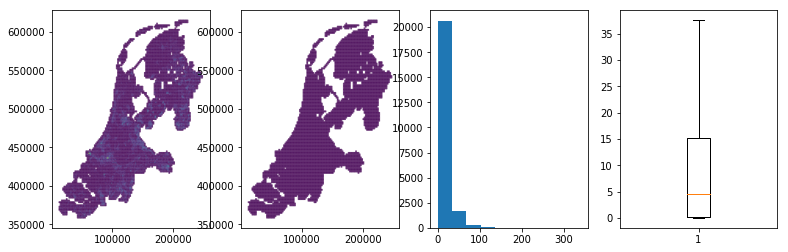

Feature: gps_time
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 0.000
Mean: 0.000 | Standard Dev: 0.000
Expected Minimum: 0.000 | Expected Maximum: 1000000.000


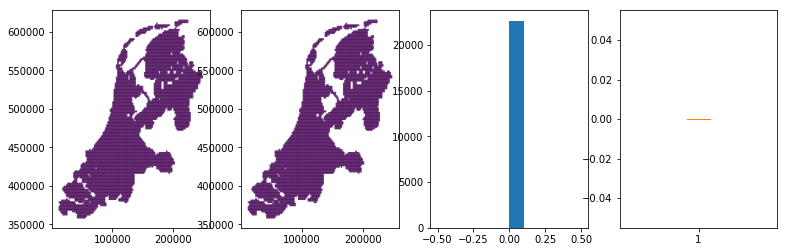

Feature: intensity
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 0.000
Mean: 0.000 | Standard Dev: 0.000
Expected Minimum: 0.000 | Expected Maximum: 1000000.000


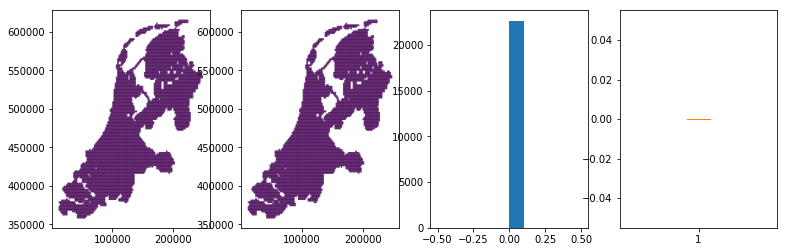

Feature: kurto_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -3.000 | Max: 3696444.145
Mean: 774.624 | Standard Dev: 31102.737
Expected Minimum: 0.000 | Expected Maximum: 20.000


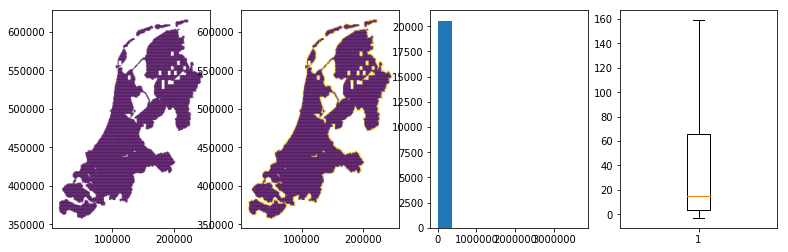

Feature: max_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -0.410 | Max: 16777.420
Mean: 25.102 | Standard Dev: 117.945
Expected Minimum: 0.000 | Expected Maximum: 50.000


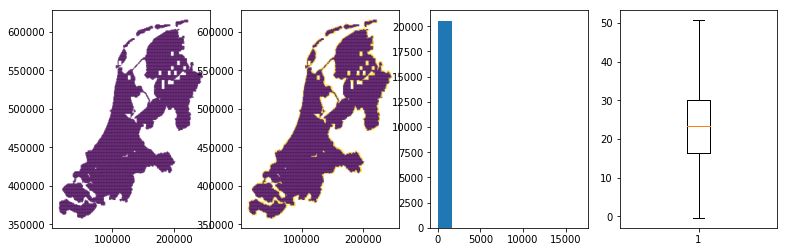

Feature: mean_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.903 | Max: 16.707
Mean: 1.526 | Standard Dev: 1.947
Expected Minimum: 0.000 | Expected Maximum: 25.000


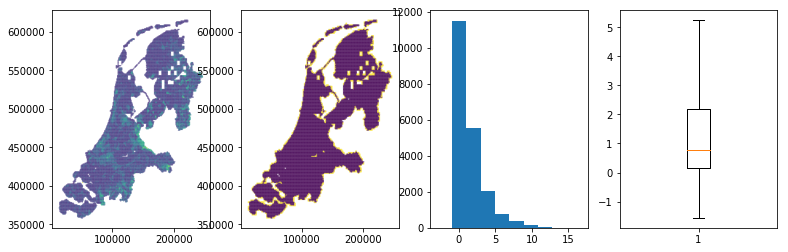

Feature: median_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.980 | Max: 18.690
Mean: 0.358 | Standard Dev: 1.480
Expected Minimum: 0.000 | Expected Maximum: 50.000


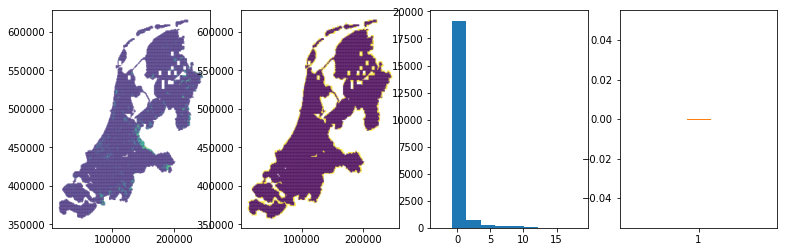

Feature: min_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -59.110 | Max: 0.580
Mean: -1.301 | Standard Dev: 1.678
Expected Minimum: 0.000 | Expected Maximum: 5.000


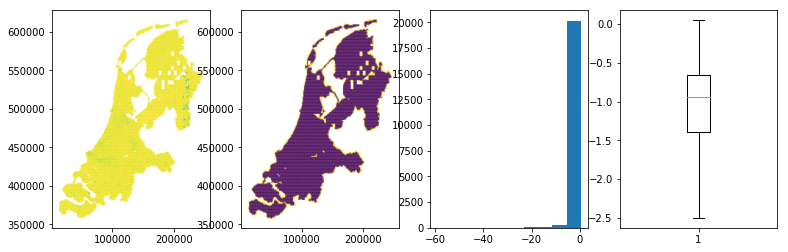

Feature: perc_10
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -6.210 | Max: 3.910
Mean: -0.012 | Standard Dev: 0.138
Expected Minimum: 0.000 | Expected Maximum: 50.000


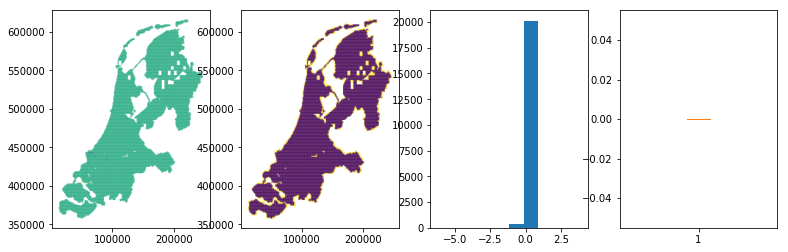

Feature: perc_100
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -0.410 | Max: 16777.420
Mean: 25.102 | Standard Dev: 117.945
Expected Minimum: 0.000 | Expected Maximum: 50.000


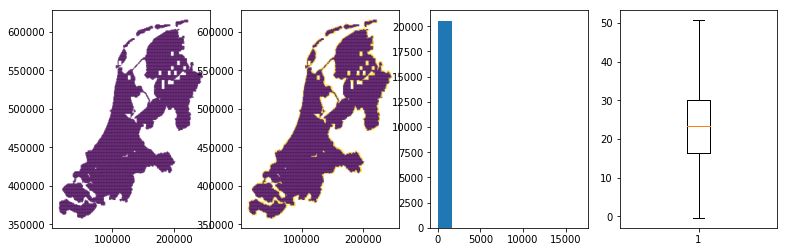

Feature: perc_20
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -6.190 | Max: 18.620
Mean: -0.005 | Standard Dev: 0.160
Expected Minimum: 0.000 | Expected Maximum: 50.000


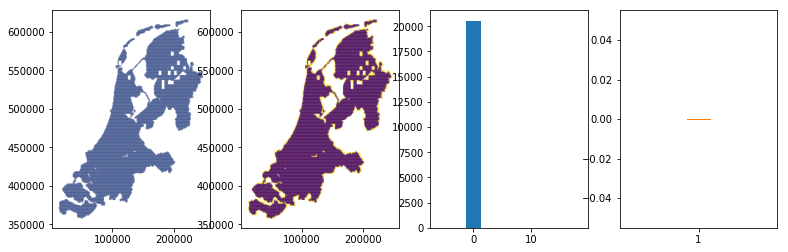

Feature: perc_30
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -5.130 | Max: 18.650
Mean: 0.015 | Standard Dev: 0.265
Expected Minimum: 0.000 | Expected Maximum: 50.000


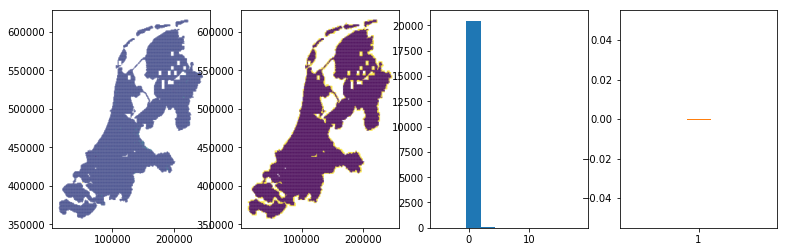

Feature: perc_40
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -3.780 | Max: 18.670
Mean: 0.114 | Standard Dev: 0.757
Expected Minimum: 0.000 | Expected Maximum: 50.000


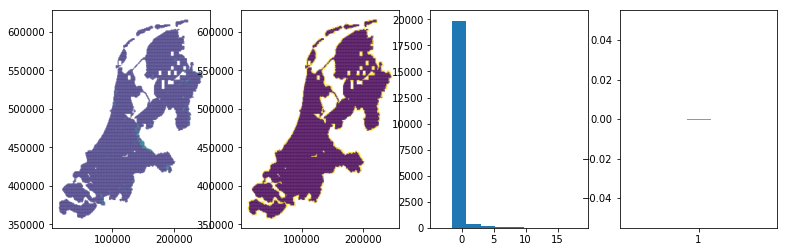

Feature: perc_50
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.980 | Max: 18.690
Mean: 0.358 | Standard Dev: 1.480
Expected Minimum: 0.000 | Expected Maximum: 50.000


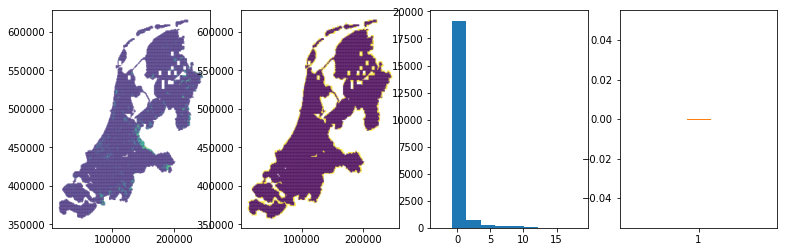

Feature: perc_60
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.920 | Max: 20.040
Mean: 0.806 | Standard Dev: 2.320
Expected Minimum: 0.000 | Expected Maximum: 50.000


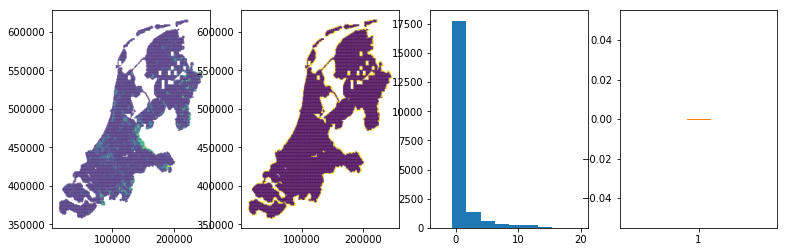

Feature: perc_70
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.850 | Max: 23.190
Mean: 1.507 | Standard Dev: 3.275
Expected Minimum: 0.000 | Expected Maximum: 50.000


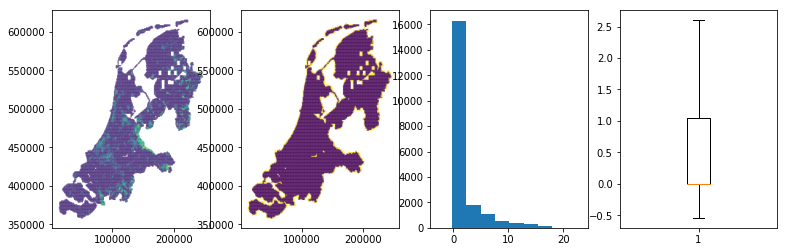

Feature: perc_80
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.750 | Max: 25.880
Mean: 2.601 | Standard Dev: 4.370
Expected Minimum: 0.000 | Expected Maximum: 50.000


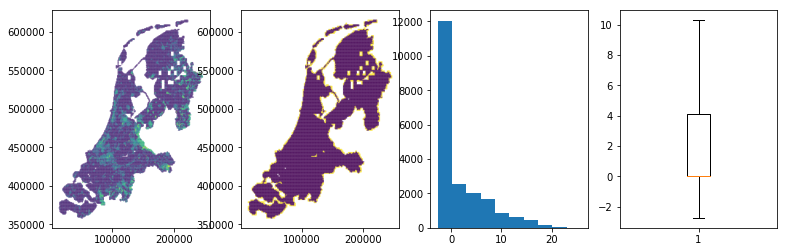

Feature: perc_90
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -2.410 | Max: 39.890
Mean: 4.693 | Standard Dev: 5.780
Expected Minimum: 0.000 | Expected Maximum: 50.000


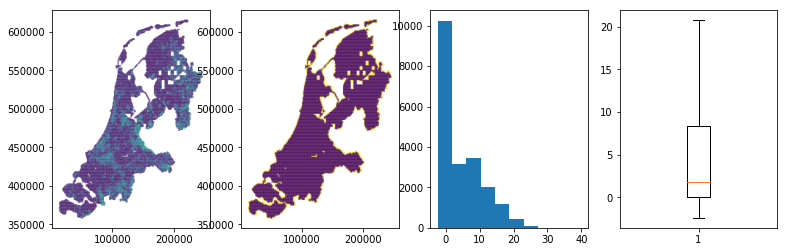

Feature: point_density
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 98.528
Mean: 12.548 | Standard Dev: 7.464
Expected Minimum: 0.000 | Expected Maximum: 60.000


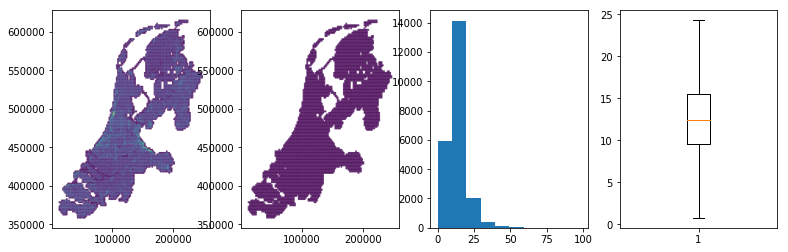

Feature: pulse_penetration_ratio
Count: 22648 | Count NaNs: 0 | Percentage NaN: 0.000
Min: 0.000 | Max: 1.000
Mean: 0.661 | Standard Dev: 0.314
Expected Minimum: 0.000 | Expected Maximum: 100.000


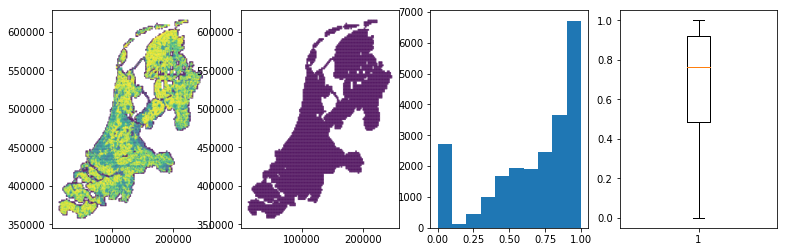

Feature: range
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: 0.000 | Max: 16778.310
Mean: 26.403 | Standard Dev: 118.004
Expected Minimum: 0.000 | Expected Maximum: 50.000


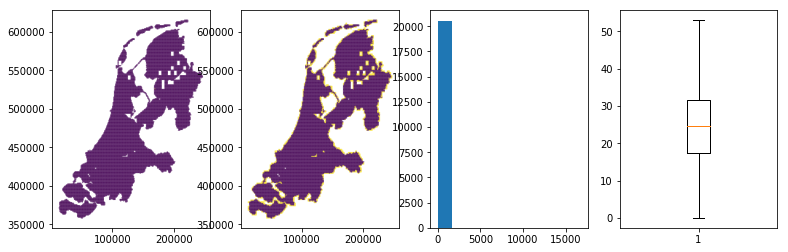

Feature: skew_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: -79.896 | Max: 1874.147
Mean: 7.700 | Standard Dev: 23.012
Expected Minimum: 0.000 | Expected Maximum: 20.000


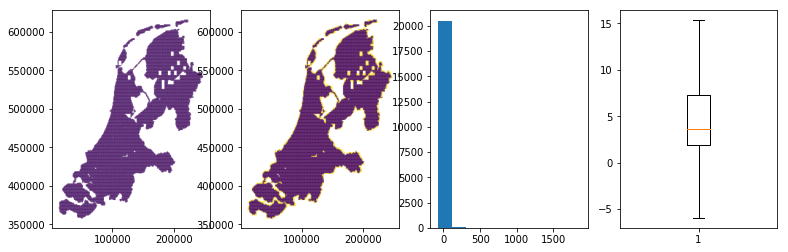

Feature: std_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: 0.000 | Max: 19.901
Mean: 2.845 | Standard Dev: 2.246
Expected Minimum: 0.000 | Expected Maximum: 20.000


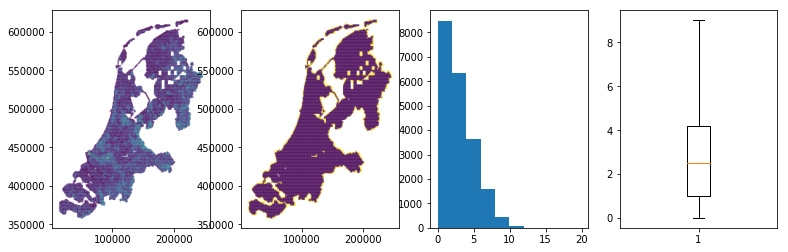

Feature: var_z
Count: 22648 | Count NaNs: 2094 | Percentage NaN: 9.246
Min: 0.000 | Max: 396.068
Mean: 13.139 | Standard Dev: 18.389
Expected Minimum: 0.000 | Expected Maximum: 20.000


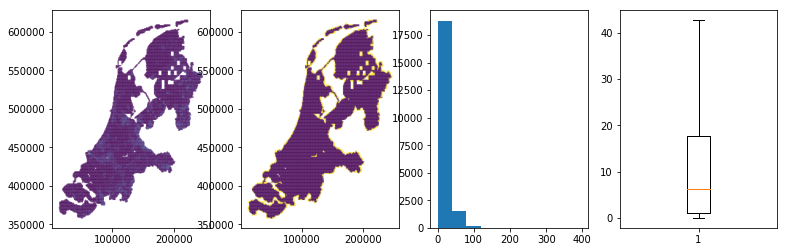

In [38]:
for i in range(3, len(terrainHeader)):
    x = terrainData1km[:, 0]
    y = terrainData1km[:, 1]
    z = terrainData1km[:, i]
    feature = terrainHeader[i]  
    summariseData(x, y, z, feature)

End of _Jupyter Notebook_.